# Saturation Diagrams of Water

*Alexander Osorio C., 2025*

## Setup

### Installing PYroMat

In [20]:
!pip install pyromat

### Importing packages

In [21]:
import pyromat as pyro
import numpy   as np
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt
from   mpl_toolkits.mplot3d import Axes3D


In [22]:
# Uses seaborn to update matplotlib's run commands (rc) parameters to improve aesthetics

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font='sans-serif',
              font_scale=1.2,
              color_codes=True,
              rc=None)

### Using SI units in PYroMat

In [ ]:
pyro.config["unit_pressure"] = "kPa"
pyro.config["unit_energy"]   = "kJ"
pyro.config["unit_matter"]   = "kg"

## Saturation Diagrams

The saturation diagrams are the graphical representations of the thermodynamic properties and phase behavior of a substance at different temperatures and pressures. They cover the region where the substance is in a two-phase mixture of liquid and vapor, as well as the regions where the substance is in a single phase of liquid or vapor. <br>
<br>
In this document, we will use the multi-phase model in PYroMat to create the following saturation diagrams of water:

- ***P-T (Phase Diagram)***: This diagram shows the regions of different phases (in this case liquid and vapor) for water at different *pressures* and *temperatures*. The phase boundaries are determined by the saturation pressure and temperature, which depend on the substance properties. The phase diagram also shows the **triple point**, where all three phases coexist, and the **critical point**, where the liquid and vapor phases become indistinguishable.

- ***P-𝝊***: Shows the relationship between *pressure* and *specific volume* for water at different phases. On a *P-𝜐* diagram, the saturation dome represents the saturated liquid-vapor region, where water can exist as a mixture of liquid and vapor at a given pressure.

- ***T-𝝊***: This diagram shows the relationship between *temperature* and *specific volume* for water at different phases. The *T-𝜐* diagram can be used to determine the phase change of a substance at a constant temperature. On a *T-𝜐* diagram, the saturation dome also represents the saturated liquid-vapor region, where water can exist as a mixture of liquid and vapor at a given temperature.

- ***T-s***: Shows the relationship between *temperature* and *specific entropy* for water at different phases.

In order to identify the **saturated liquid-vapor region** on these diagrams, we need to plot the **saturated liquid line** and the **saturated vapor line**, which connect the saturated liquid states and the saturated vapor states, respectively. The saturated liquid line and the saturated vapor line form a curve called the **saturation dome**. The states below the dome are in equilibrium between two phases at a given pressure or temperature.

Before creating the saturation diagrams, it is necessary to identify both the *triple-point* and the *critical-point* properties of water. These are the points where water has unique behavior and phase transitions. This data can be retrieved from the multi-phase model for water of PYroMat.

## Substance Properties

### Retrieving data from multiphase-water

In [24]:
water = pyro.get("mp.H2O")

> *Note*: The name given to the retrieved data is arbitrary. Here it is called **water**, but it could be called **steam** or any other name instead. What is important is to keep using the same name for the data through the document.

### Triple point properties of water

The triple point of a substance is where such substance can exist as solid, liquid, and vapor simultaneously. The `triple` command in PYroMat returns the triple point temperature and pressure for a given substance. To store those values in different variables, we use the assignment operator `=` with two variables on the left-hand side and the `triple` command on the right-hand side.

In [25]:
Tt, Pt = water.triple()

print(f'Triple Point Temperature: {Tt:.2f} K')
print(f'   Triple Point Pressure: {Pt:.5f} kPa')

Triple Point Temperature: 273.16 K
   Triple Point Pressure: 0.61165 kPa


### Critical point properties of water

The critical point is where the liquid and vapor phases become indistinguishable, and it has a higher temperature and pressure than the triple point. The `critical` command of PYroMat brings the value of the temperature and the pressure at the critical point for the substance, in that order. We will use two variables to store those values.  

In [26]:
Tc, Pc = water.critical()

print(f'Critical Point Temperature: {Tc:.2f} K')
print(f'   Critical Point Pressure: {Pc:.0f} kPa')

Critical Point Temperature: 647.10 K
   Critical Point Pressure: 22064 kPa


### Equilibrium states of the two-phase mixture

A *two-phase mixture* is a system that contains both liquid and vapor phases of a pure substance or a mixture of substances. By characterizing the equilibrium states of its two-phase mixture, we can determine the quality, enthalpy, entropy, and other properties of the system.

#### Temperature interval of the saturation region

To plot the saturation diagrams, we need to specify a range of temperatures that covers the region where the liquid and vapor phases coexist. This region lies between the triple point and the critical point of the substance. We can use the *numpy* function `arange` to create an array of temperatures with a given *start value*, *end value*, and *step size*. The syntax of the function is: `arange(start_value, end_value, step)`.

In [ ]:
# Temperature vector spanning (Tt, Tc) with a 0.5 K step (avoid including the exact endpoints)
T = np.arange(Tt + 1e-3, Tc - 1e-3, 0.5) # K

print(f"T grid: {T[0]:.2f} K to {T[-1]:.2f} K; n = {T.size} points")

T grid: 273.16 K to 646.66 K; n = 748 points


This command creates a set of values called an *array*. This is a special variable in Python that can hold more than one value at a time. It is a fundamental data structure for storing and manipulating homogeneous data.

#### Saturation pressures

We will use the `ps` function in PYroMat to get the saturation pressures. It can be used to plot the phase diagram on a *P-T* plane and the *saturation dome* on a *P-𝜐* diagram. The `ps` function accepts a temperature or an array of temperatures in Kelvin, that must be within the range of the triple point and the critical point of the substance.

In [28]:
psat = water.ps(T=T) # kPa

#### Saturated liquid and vapor specific volumes

The `vs` function in PYroMat returns the **saturated liquid and vapor specific volumes** ($\upsilon_f$ and $\upsilon_g$).

In [29]:
vf, vg = water.vs(T) # m³/kg

#### Saturated liquid and vapor specific entropies

The saturated liquid and vapor specific entropies ($s_f$ and $s_g$) can be retrieved with the `ss` function in PYroMat.

In [ ]:
sf, sg = water.ss(T) # kJ/(kg·K)

#### Saturation properties

In [ ]:
# Create a DataFrame for the saturation properties
sat_water = pd.DataFrame({
    "Tsat (K)": T,
    "Psat (kPa)": psat,
    "v𝑓 (m³/kg)": vf,
    "v𝑔 (m³/kg)": vg,
    "s𝑓 (kJ/kg·K)": sf,
    "s𝑔 (kJ/kg·K)": sg,
})

# Peek
sat_water.head(11)

,Tsat (K),Psat (kPa),v𝑓 (m³/kg),v𝑔 (m³/kg),s𝑓 (kJ/kg·K),s𝑔 (kJ/kg·K)
0,273.161,0.611702,0.001,205.990297,0.000015,9.155594
1,273.661,0.634283,0.001,199.018290,0.007731,9.142230
2,274.161,0.657599,0.001,192.310055,0.015429,9.128927
3,274.661,0.681673,0.001,185.854642,0.023111,9.115686
4,275.161,0.706524,0.001,179.641594,0.030776,9.102506
5,275.661,0.732174,0.001,173.660924,0.038424,9.089387
6,276.161,0.758646,0.001,167.903088,0.046056,9.076328
7,276.661,0.785961,0.001,162.358969,0.053671,9.063329
8,277.161,0.814142,0.001,157.019853,0.061270,9.050390
9,277.661,0.843214,0.001,151.877414,0.068854,9.037510


## *P - T* diagram

This diagram, often called the **phase diagram**, shows the regions of different phases for a pure substance at different pressures and temperatures. The phase diagram has a curve that represents the saturation line, where the substance is in equilibrium between two phases, in the range of temperatures between the triple and the critical point.

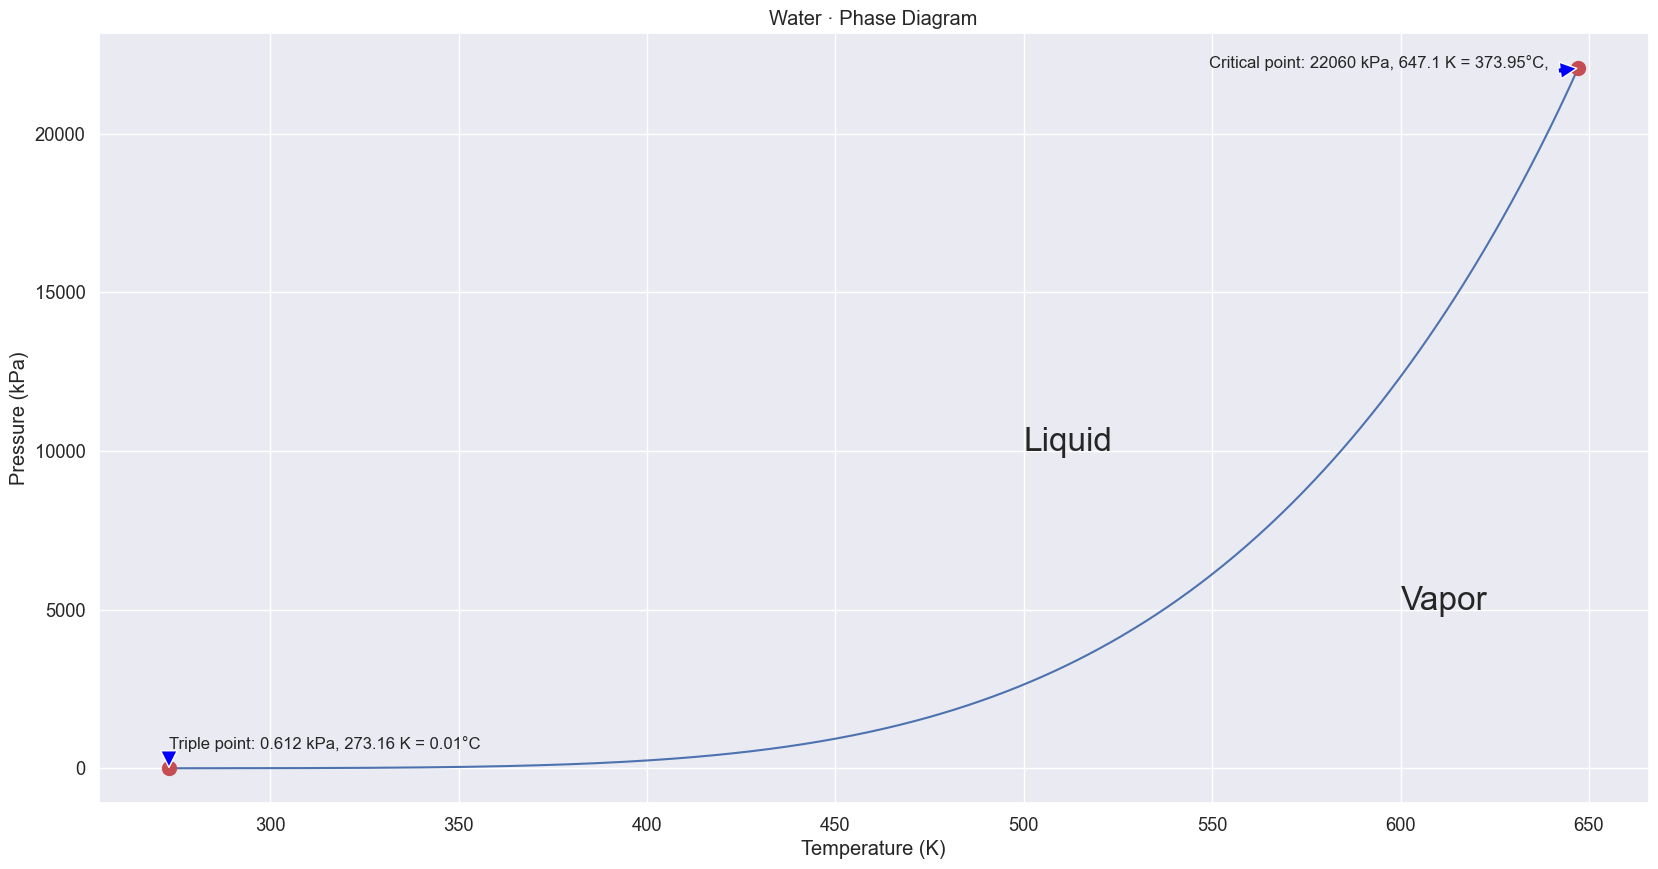

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title('Water · Phase Diagram')

# phase diagram
ax.plot(T, psat, 'b')

# labels for phases 
ax.text(500, 10000, 'Liquid', size=24)
ax.text(600, 5000,  'Vapor',  size=24)

# triple point
ax.plot(Tt, Pt, 'ro', markersize=10) # state marker

ax.annotate('Triple point: 0.612 kPa, 273.16 K = 0.01°C', xy=(Tt, Pt), xytext=(Tt, Pt*1000),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=12, ha='left') # label

# critical point
ax.plot(Tc, Pc, 'ro', markersize=10) # state marker

ax.annotate('Critical point: 22060 kPa, 647.1 K = 373.95°C, ', xy=(Tc, Pc), xytext=(0.99*Tc, Pc),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=12, ha='right') # label

# axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Temperature (K)')

plt.show()

## *P - $\upsilon$* diagram

This diagram shows the relationship between *pressure* and *specific volume* for a pure substance at different phases. <br>
<br>
The saturated liquid line and the saturated vapor line are, in terms of specific volume, the lower and upper boundaries of the saturation dome, respectively. The area at the left of the saturated liquid line is the **compressed liquid region**, where water behaves like an incompressible liquid. The area to the right of the saturated vapor line is the **superheated vapor region**, where water behaves like an ideal gas. The points on the saturation dome where the pressure reaches its minimum and maximum values are the *triple point* and the *critical point*, respectively.<br>
<br>
The *P-𝜐* diagram is shown in a logarithmic graph because in that way it can better display the wide range of values and the shape of the curve for the saturation dome.


### Logarithmic graph

In this diagram, the specific volume of water can vary from very low values in the compressed liquid region to very high values in the superheated vapor region. A logarithmic graph can show these values more clearly and proportionally than a linear graph. Similarly, the saturation dome has a curved shape that can be better approximated by a logarithmic function than a linear function. A logarithmic graph can show the curvature and the slope of the saturation dome more accurately and smoothly than a linear graph.<br>
<br>
> Remember that a logarithmic graph is a graph that uses logarithmic scales for one or both axes, which means that each interval increases by a factor that is equal to the base of the logarithm, instead of increasing in equal increments. This can make it easier to see the trends and patterns of the data, especially when there are large differences in magnitude or exponential growth or decay.

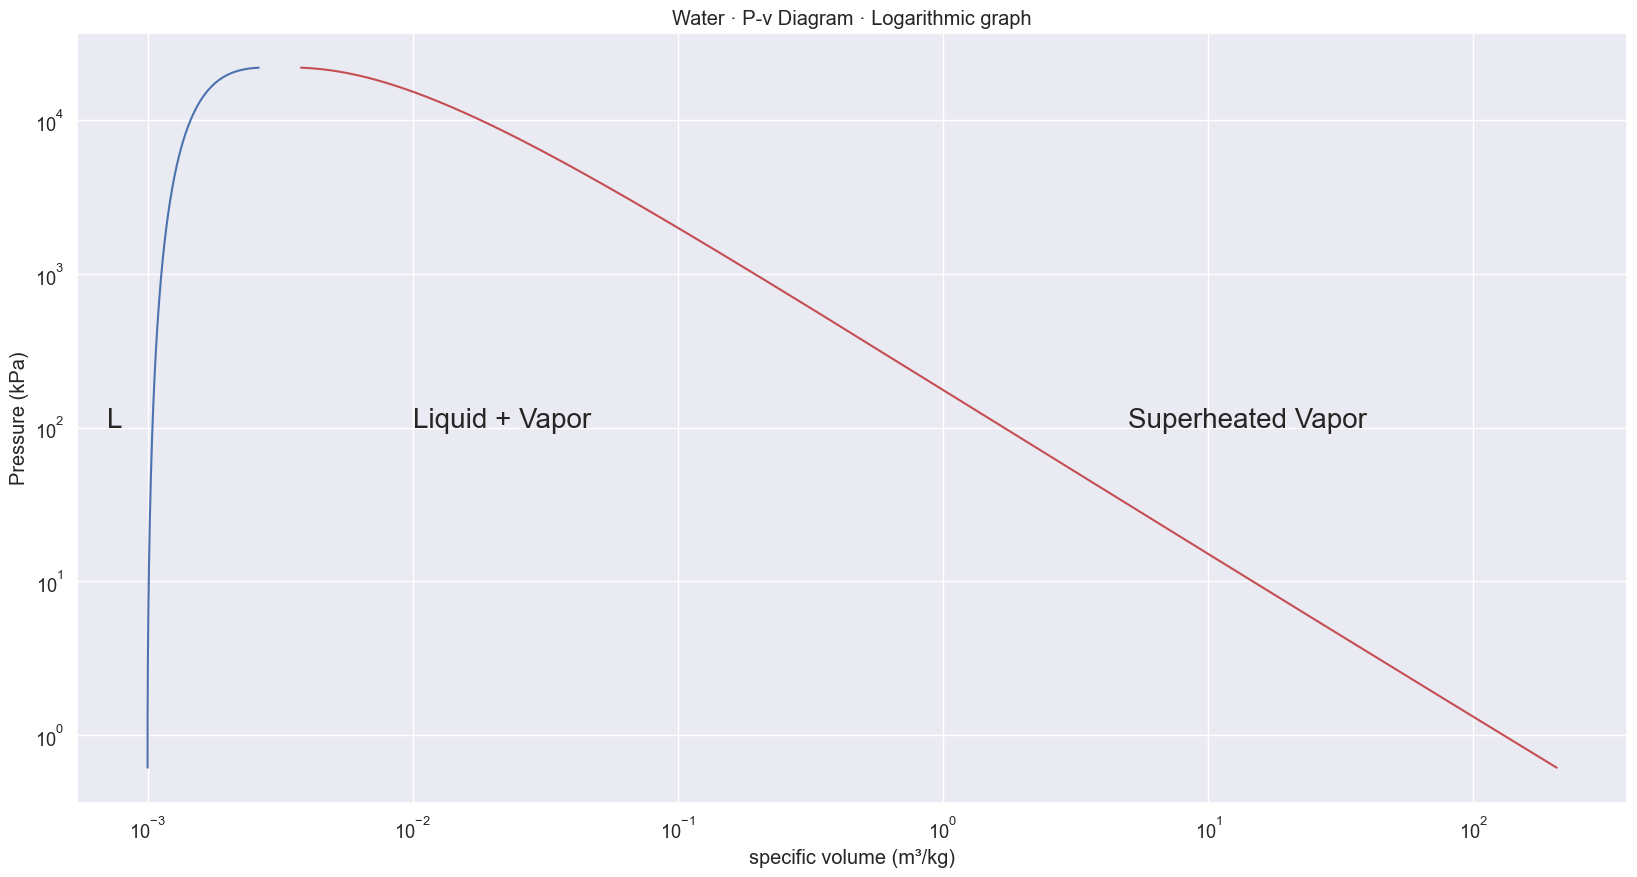

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title(r'Water · P-$\upsilon$ Diagram · Logarithmic graph')

# creation of the log scales
ax.set_xscale("log")
ax.set_yscale("log")

# saturation diagram
ax.plot(vf, psat, 'b')
ax.plot(vg, psat, 'r')

# liquid phase label
ax.text(0.0007, 100, 'L', size=20)

# liquid+vapor phase label
ax.text(0.01, 100, 'Liquid + Vapor', size=20)

# superheated vapor phase label
ax.text(5, 100, 'Superheated Vapor', size=20)

# axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

### Logarithmic graph (grids)

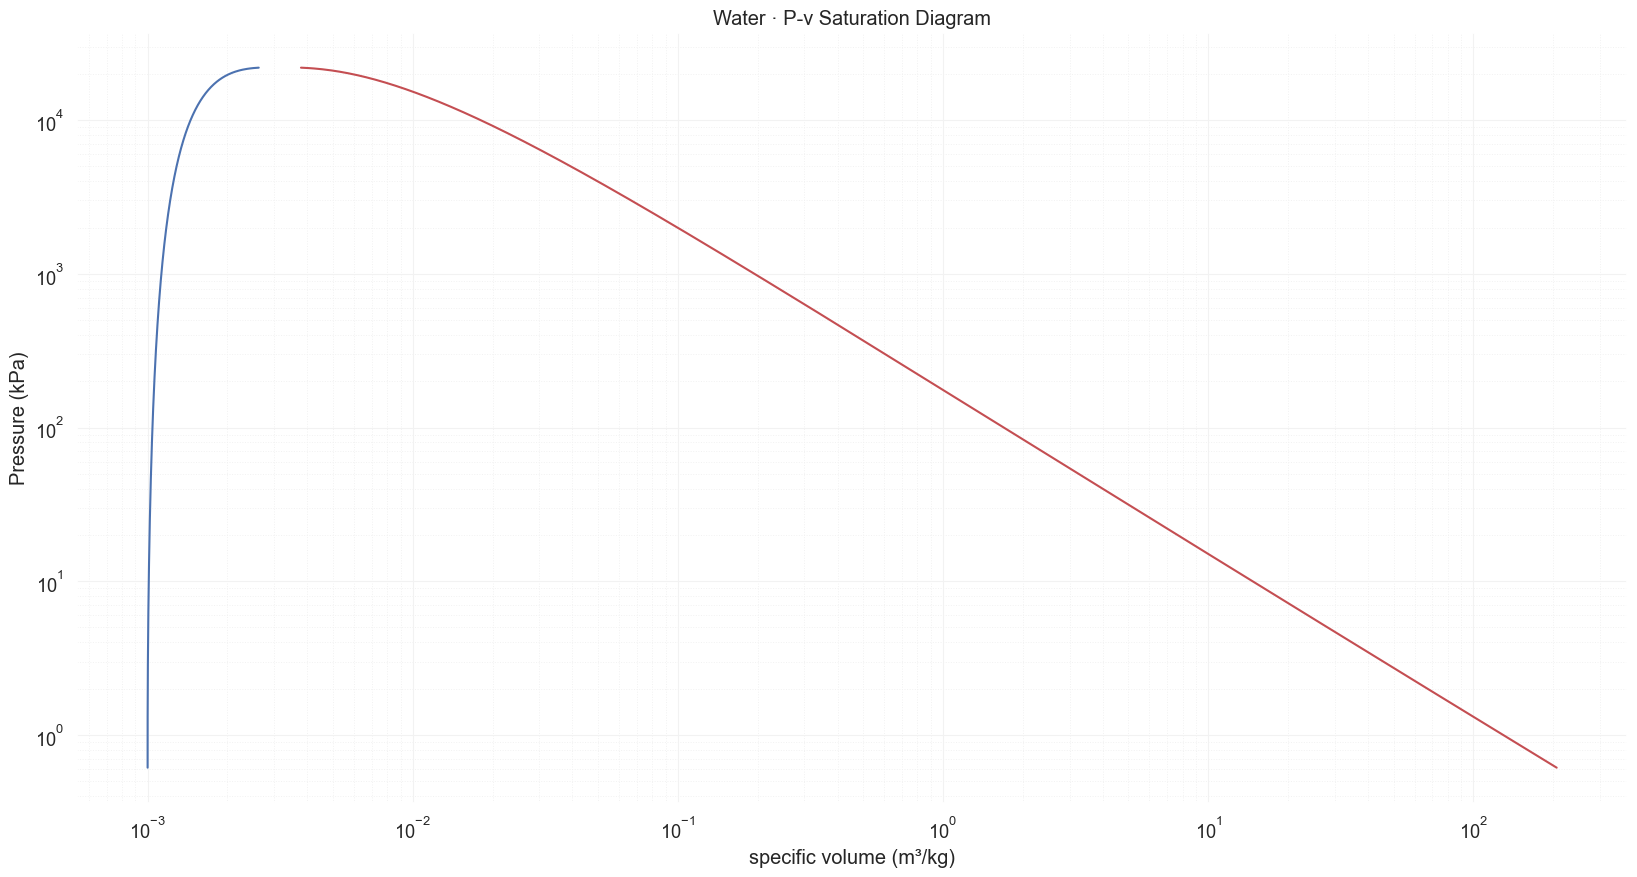

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')  # figure bg
ax.set_facecolor('white')                                   # axes bg
ax.set_axisbelow(True)                                      # grid behind curves

# log scales
ax.set_xscale("log")
ax.set_yscale("log")

# subtle grid
ax.grid(which='major', color='0.95', linewidth=0.8)
ax.grid(which='minor', color='0.95', linewidth=0.7, linestyle=':')

# title
ax.set_title(r'Water · P-$\upsilon$ Saturation Diagram')

# curves
ax.plot(vf, psat, 'b', zorder=3)
ax.plot(vg, psat, 'r', zorder=3)

# labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

### Graph in normal scale

Graphing the saturation *P-𝜐* diagram in a normal scale as a way of comparison with the logarithmic scale will help to see the differences and similarities between the two graphs, and to understand the advantages and disadvantages of each scale.

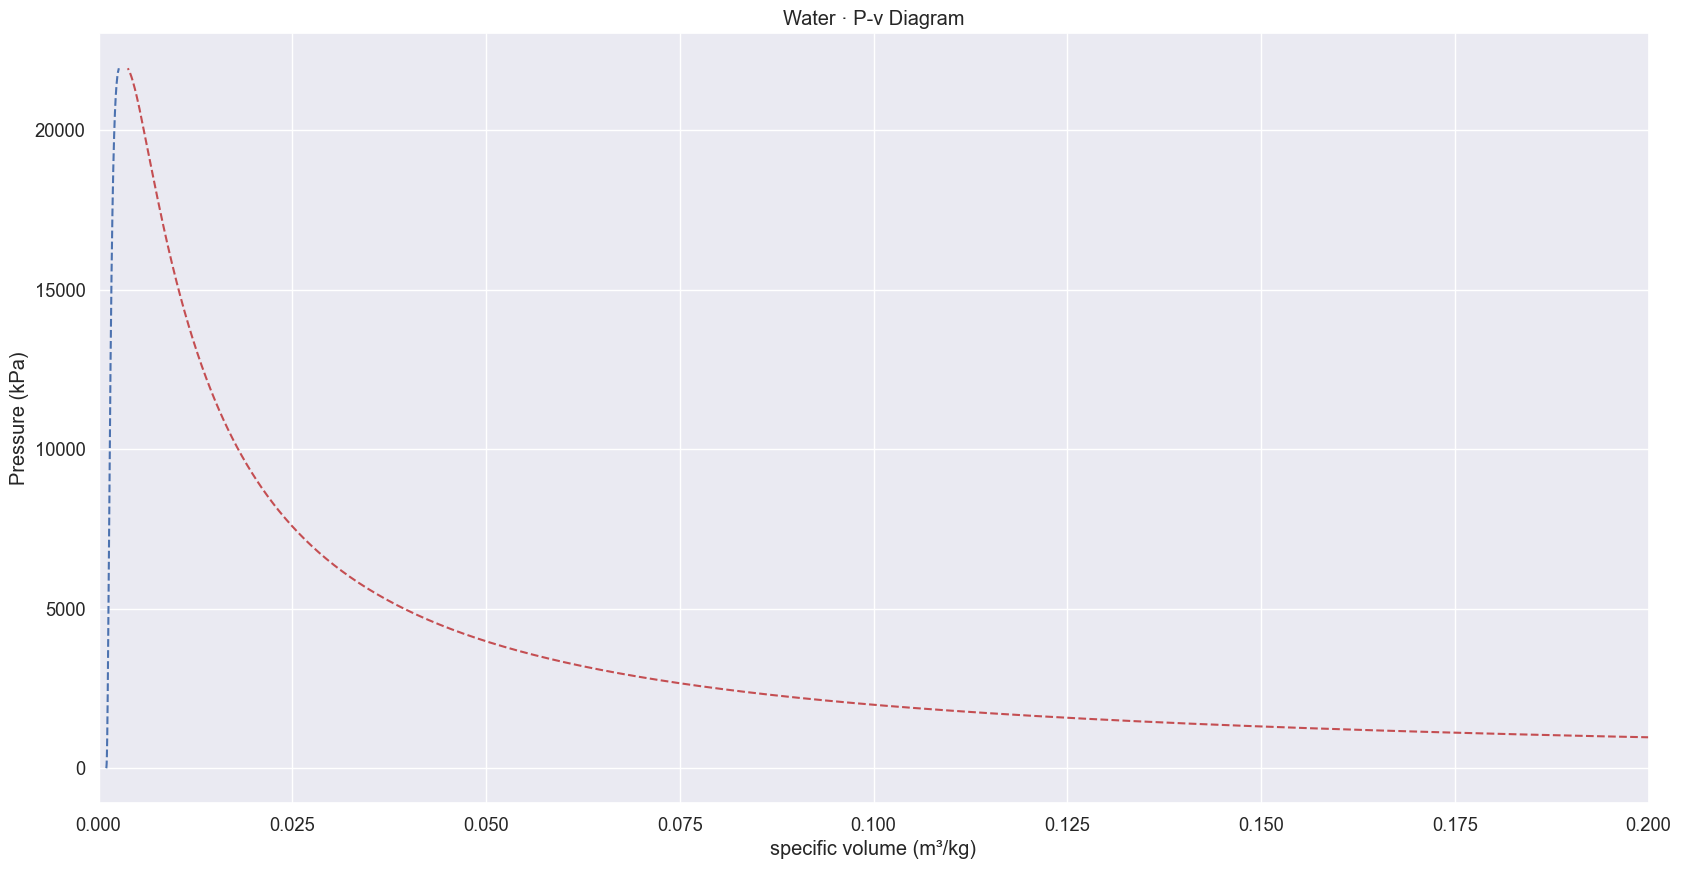

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title(r'Water · P-$\upsilon$ Diagram')

# axis limits
ax.set_xlim([0, 0.2])

# saturation diagram
ax.plot(vf, psat, 'b--')
ax.plot(vg, psat, 'r--')

# axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

We can see that the normal scale graph is more distorted and less clear than the logarithmic scale graph. The saturation dome is very narrow and flat, and the compressed liquid and superheated vapor regions are very wide and steep. The normal scale graph does not show the shape and the slope of the saturation dome well, and it does not display the wide range of values proportionally. Therefore, the logarithmic scale graph is more suitable for showing the saturation *P-𝜐* diagram of a substance.

## *T - $\upsilon$* diagram

This diagram shows the relationship between *temperature* and *specific volume* for a pure substance at different phases. <br>
<br>
The saturated liquid line and the saturated vapor line are again, in terms of specific volume, the lower and upper boundaries of the saturation dome, respectively. The area at the left of the saturated liquid line is the **subcooled liquid region**, where water is more dense and less likely to boil. The area to the right of the saturated vapor line is the **superheated vapor region**, where water has a higher specific volume than the saturated vapor at the same temperature, meaning it is less dense and more likely to expand. The points on the saturation dome where the temperature reaches its minimum and maximum values are again the *triple point* and the *critical point*, respectively. <br>
<br>
To better visualize the wide range of values and the shape of the curve for the saturation dome, we use a semi-logarithmic graph for the *T-𝜐* diagram.

### Semi-logarithmic graph

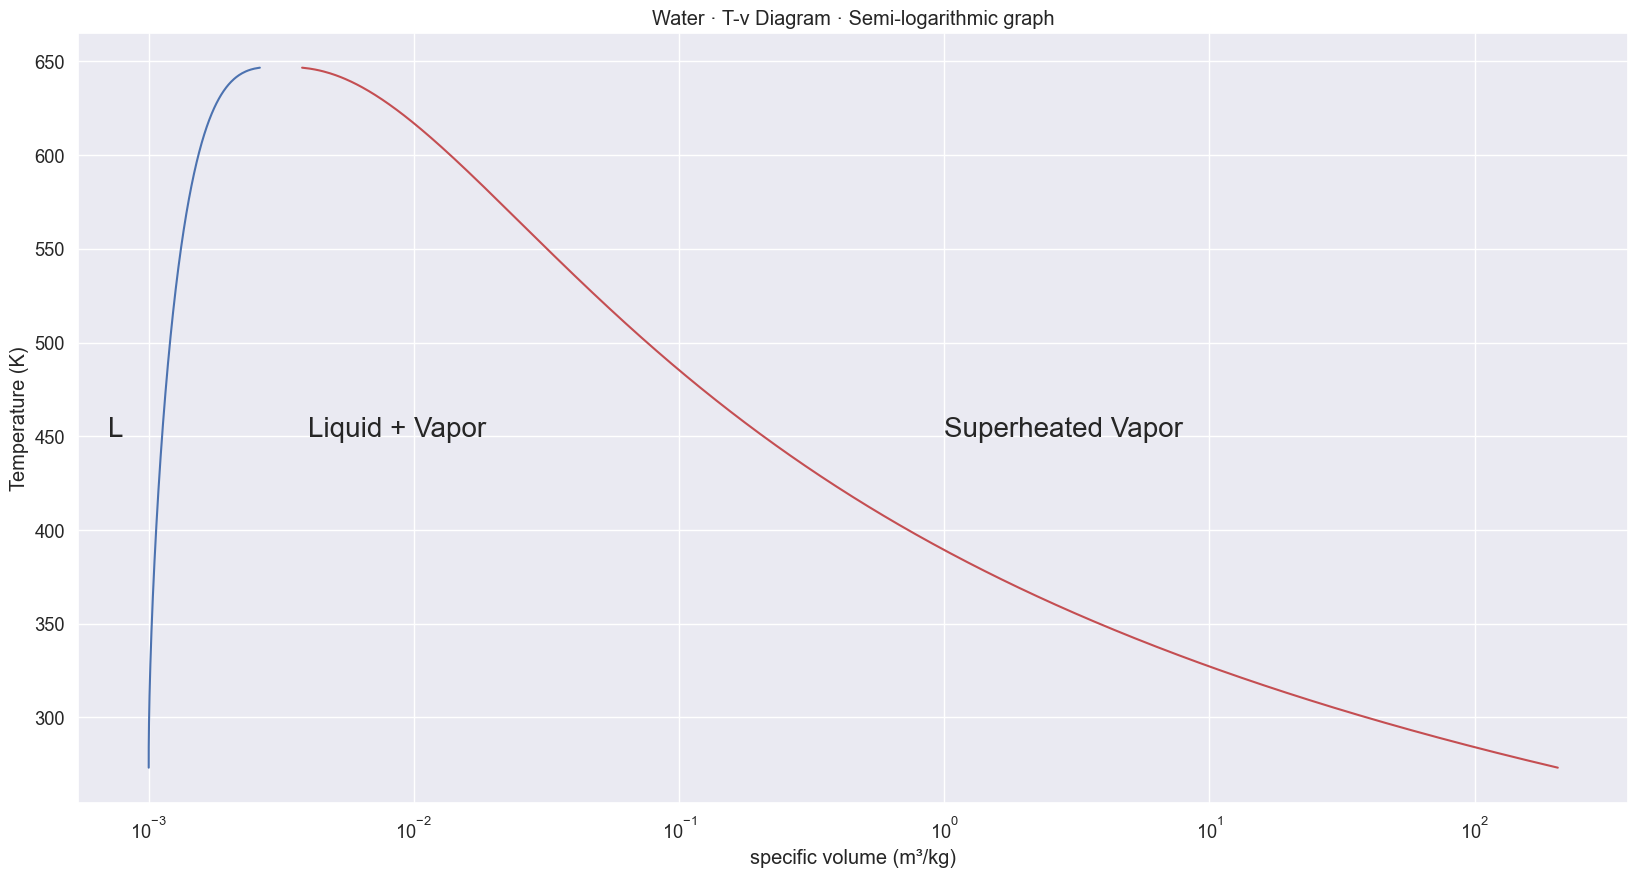

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title(r'Water · T-$\upsilon$ Diagram · Semi-logarithmic graph')

# creation of the log scale
ax.set_xscale("log")

# saturation diagram
ax.plot(vf, T, 'b')
ax.plot(vg, T, 'r')

# liquid phase label
ax.text(0.0007, 450, 'L', size=20)

# liquid+vapor phase label
ax.text(0.004, 450, 'Liquid + Vapor', size=20)

# superheated vapor phase label
ax.text(1, 450, 'Superheated Vapor', size=20)

# axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

### Graph in normal scale

Here we show the saturation *T-𝜐* diagram in normal scale in order to compare it with the semi-logarithmic scale.

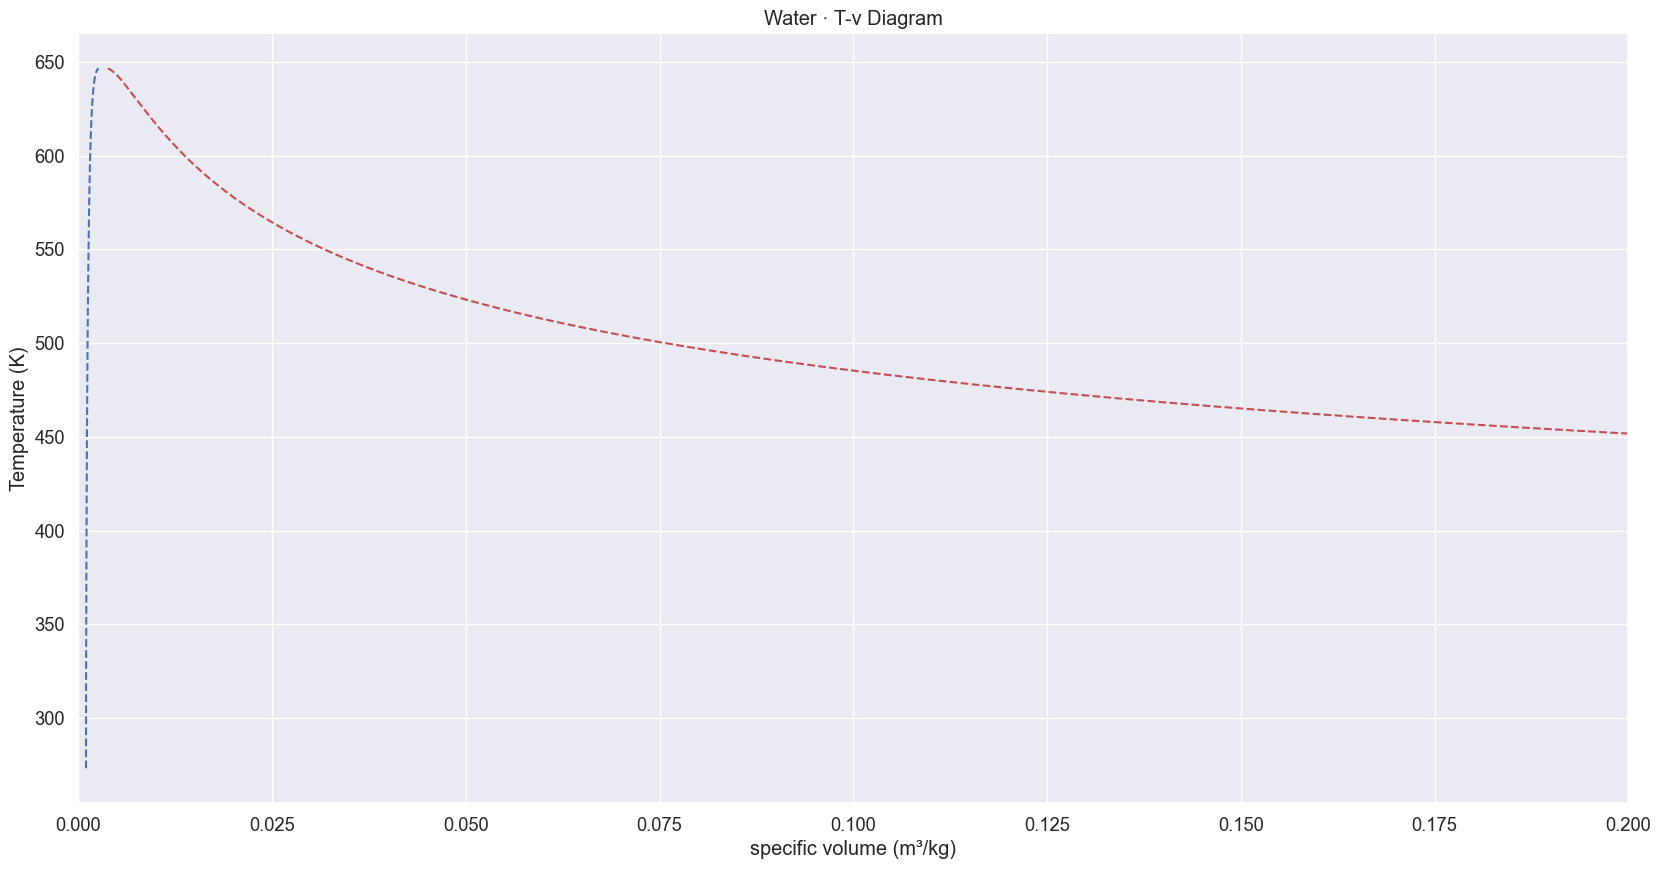

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title(r'Water · T-$\upsilon$ Diagram')

# axis limits
ax.set_xlim([0,0.2])

# saturation diagram
ax.plot(vf, T, 'b--')
ax.plot(vg, T, 'r--')

# axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

## *T - s* diagram

*Specific entropy* is a measure of the disorder or randomness of a system. The *T-s* diagram can be used to evaluate the irreversibility or efficiency of a thermodynamic process.

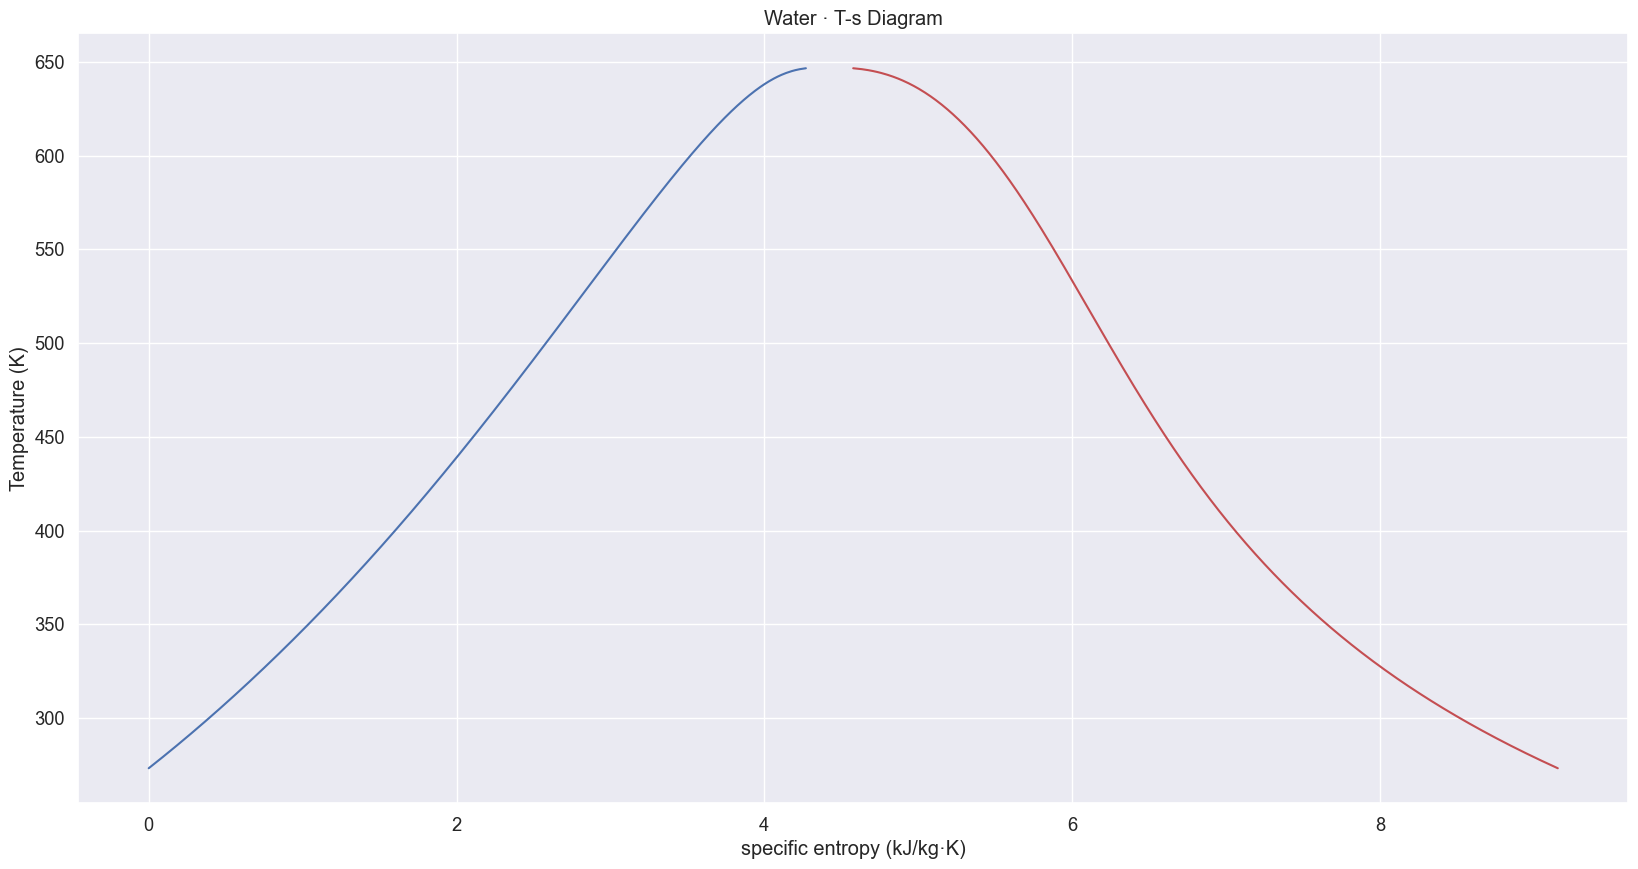

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title('Water · T-s Diagram')

# saturation diagram
ax.plot(sf, T, 'b')
ax.plot(sg, T, 'r')

# axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific entropy $\left( \mathrm{\frac{kJ}{kg \cdot K}} \right)$')

plt.show()

# Conclusion

In this document, we have learned how to create saturation diagrams of water using the multi-phase model in PYroMat. We have seen how to plot the phase *(P-T)* diagram, the *P-𝜐* diagram, the *T-𝜐* diagram, and the *T-s* diagram of water, and how to identify the regions of different phases and phase transitions. We have also learned how to retrieve the *triple-point* and *critical-point* properties of water from the multi-phase model. These diagrams are useful tools for understanding the thermodynamic behavior and properties of water at various conditions. They can also help us to design and analyze processes involving an specific substance as a working fluid, such as power generation, refrigeration, and heat transfer.